In [1]:
import yfinance as yf
import numpy as np

df  = yf.download("AMZN", start='2010-01-01', end='2023-01-09')

df.reset_index(drop=True, inplace=True)

df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
0,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [2]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [5]:
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
clf= SVR(kernel='rbf')

from sklearn.neural_network import BernoulliRBM
rbm1 = BernoulliRBM(n_components=5, learning_rate=0.06, n_iter=100, verbose=1,  random_state=101)
rbm2 = BernoulliRBM(n_components=4, learning_rate=0.05, n_iter=80, verbose=1,  random_state=97)
rbm3 = BernoulliRBM(n_components=3, learning_rate=0.03, n_iter=70, verbose=1,  random_state=80)

model = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3), ("clf", clf)])
model = model.fit(X_train.values, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.41, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.30, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.24, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.16, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.11, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.04, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.02, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -1.95, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -1.94, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.95, time = 0.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -1.92, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.85, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -1.85, time = 0.02s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -1.86, time = 0.02s
[BernoulliRBM] Iteration 15, pseudo-likelih

[BernoulliRBM] Iteration 21, pseudo-likelihood = -3.00, time = 0.03s
[BernoulliRBM] Iteration 22, pseudo-likelihood = -3.01, time = 0.02s
[BernoulliRBM] Iteration 23, pseudo-likelihood = -3.04, time = 0.02s
[BernoulliRBM] Iteration 24, pseudo-likelihood = -3.02, time = 0.02s
[BernoulliRBM] Iteration 25, pseudo-likelihood = -3.02, time = 0.02s
[BernoulliRBM] Iteration 26, pseudo-likelihood = -3.02, time = 0.02s
[BernoulliRBM] Iteration 27, pseudo-likelihood = -3.03, time = 0.02s
[BernoulliRBM] Iteration 28, pseudo-likelihood = -3.04, time = 0.02s
[BernoulliRBM] Iteration 29, pseudo-likelihood = -3.07, time = 0.02s
[BernoulliRBM] Iteration 30, pseudo-likelihood = -3.05, time = 0.02s
[BernoulliRBM] Iteration 31, pseudo-likelihood = -3.03, time = 0.02s
[BernoulliRBM] Iteration 32, pseudo-likelihood = -3.05, time = 0.01s
[BernoulliRBM] Iteration 33, pseudo-likelihood = -3.02, time = 0.02s
[BernoulliRBM] Iteration 34, pseudo-likelihood = -2.98, time = 0.04s
[BernoulliRBM] Iteration 35, pseud

[BernoulliRBM] Iteration 64, pseudo-likelihood = -2.56, time = 0.03s
[BernoulliRBM] Iteration 65, pseudo-likelihood = -2.56, time = 0.03s
[BernoulliRBM] Iteration 66, pseudo-likelihood = -2.57, time = 0.02s
[BernoulliRBM] Iteration 67, pseudo-likelihood = -2.57, time = 0.01s
[BernoulliRBM] Iteration 68, pseudo-likelihood = -2.56, time = 0.02s
[BernoulliRBM] Iteration 69, pseudo-likelihood = -2.56, time = 0.02s
[BernoulliRBM] Iteration 70, pseudo-likelihood = -2.57, time = 0.03s


In [6]:
y_test = y_test.sort_index()

y_test

1        6.734500
4        6.676000
9        6.357000
10       6.380500
15       5.974000
          ...    
3260    91.580002
3265    86.769997
3266    83.790001
3271    84.000000
3274    83.120003
Name: Adj Close, Length: 656, dtype: float64

In [7]:
X_test = X_test.sort_index()

X_test

,Open,High,Low,Close,Volume
1,0.007559,0.006606,0.007243,0.007199,0.191879
4,0.006770,0.006114,0.006469,0.006876,0.215437
9,0.006391,0.005014,0.005920,0.005115,0.348947
10,0.005602,0.004563,0.005160,0.005245,0.192858
15,0.004021,0.003192,0.003693,0.003000,0.208901
...,...,...,...,...,...
3260,0.479394,0.480068,0.471068,0.475596,0.063399
3265,0.444651,0.446041,0.445114,0.449042,0.050122
3266,0.441022,0.437576,0.428628,0.432591,0.076800
3271,0.427829,0.428673,0.429854,0.433750,0.053809


In [8]:
y_pred = model.predict(X_test.values)

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

51.90449947782641

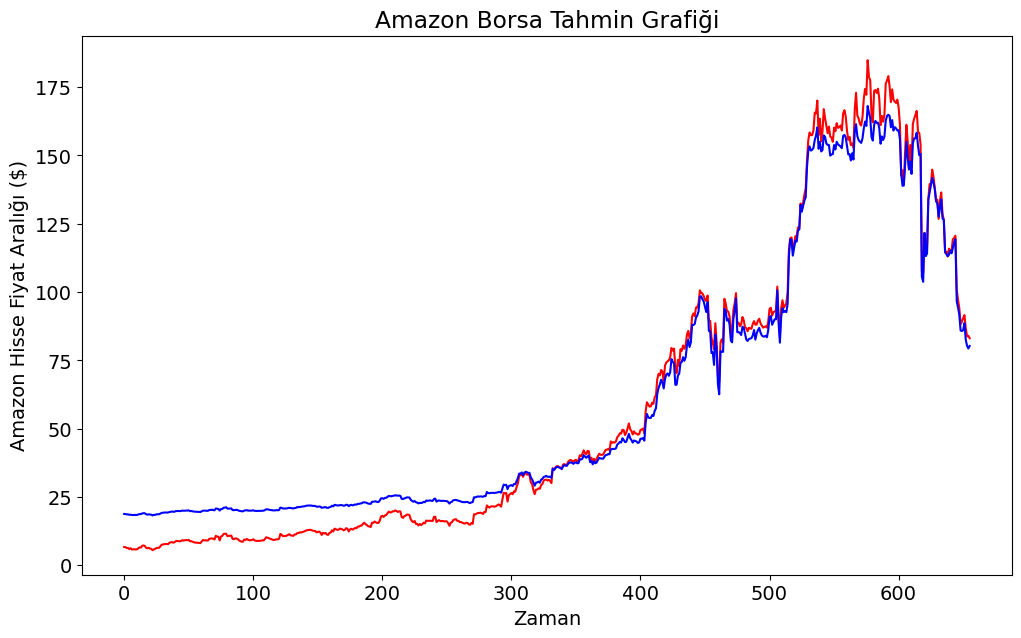

In [10]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

predicted_stock_price = y_pred
actual_stock_price = y_test

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

plt.plot(np.arange(656),actual_stock_price, color="red", label="Gerçek Amazon Hisse Fiyatları")
plt.plot(np.arange(656),predicted_stock_price, color="blue", label="Tahmin Edilen Amazon Hisse Fiyatları")
plt.title("Amazon Borsa Tahmin Grafiği")

plt.xlabel("Zaman")
plt.ylabel("Amazon Hisse Fiyat Aralığı ($)")
plt.show();